### Importing the libraries:

In [36]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Importing the data:

In [13]:
data = pd.read_csv('book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Trying to see which are the frequent books bought together by changing the Support value:

In [31]:
# function to compute the frequent item set
def frequent_itemsets(suppport, length):
    frequent_itemsets = apriori(data, min_support=suppport, max_len=length,use_colnames = True)
    return frequent_itemsets 

In [138]:
def plotting_frequent_items(rules, x=20,y=20):
    fig, ax=plt.subplots(figsize=(x,y))
    graph=nx.from_pandas_edgelist(rules,source="antecedents",target='consequents')
    nx.draw(graph,with_labels=True)
    plt.show()

### Building the model:

In [130]:
fi_1 = frequent_itemsets(0.12, 3)
fi_1.sort_values('support',ascending = False,inplace=True)
fi_1.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
8    0.2560            (CookBks, ChildBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
12   0.1950            (GeogBks, ChildBks)
18   0.1925             (GeogBks, CookBks)
15   0.1875            (CookBks, DoItYBks)
9    0.1840           (DoItYBks, ChildBks)
17   0.1670              (ArtBks, CookBks)
7    0.1650           (YouthBks, ChildBks)
11   0.1625             (ArtBks, ChildBks)
13   0.1620            (YouthBks, CookBks)
16   0.1525              (RefBks, CookBks)
10   0.1515             (RefBks, ChildBks)
26   0.1495   (GeogBks, CookBks, ChildBks)
23   0.1460  (DoItYBks, CookBks, ChildBks)
20   0.1325            (GeogBks, DoItYBks)
22   0.1290  (Y

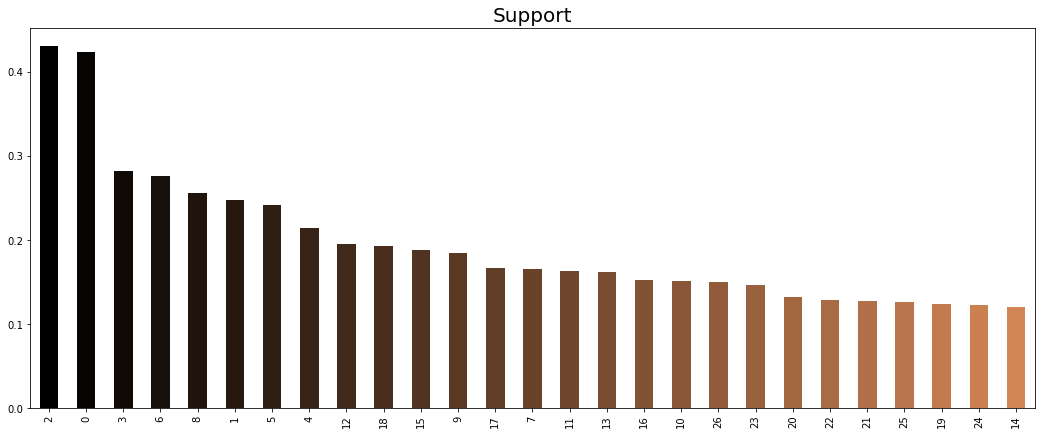

In [108]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
fi_1["support"].plot.bar(color = color)
plt.title('Support', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

###### Observation: Cookbooks are bought the most and childbooks are the second most selling in this store.

In [131]:
rules = association_rules(fi_1, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
55,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
25,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
24,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
47,(ArtBks),"(CookBks, ChildBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
46,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
38,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
39,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
30,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
31,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706


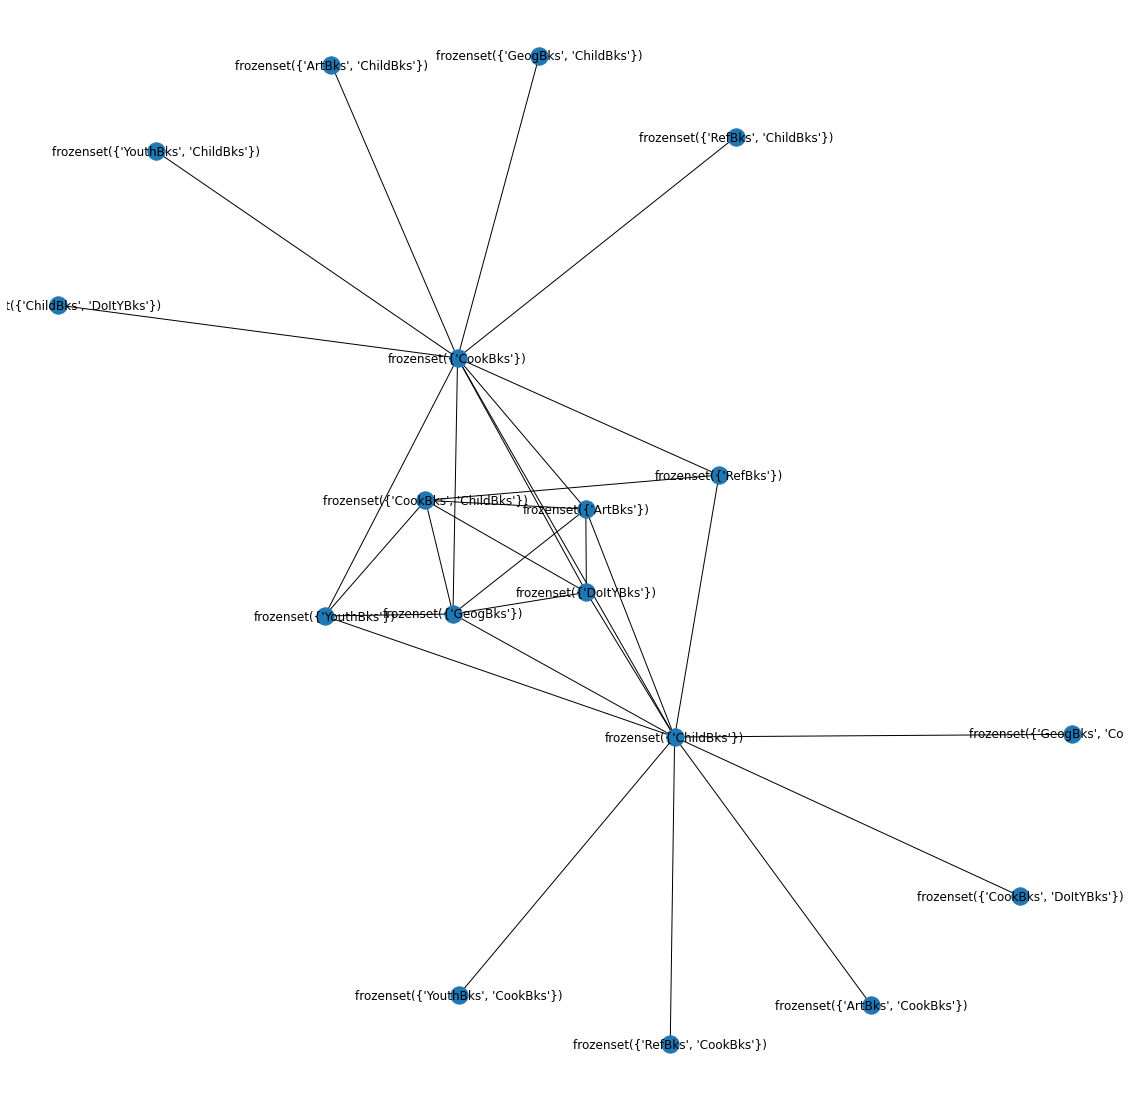

In [139]:
plotting_frequent_items(rules)

###### As we know the highest books that are sold are the Cookbooks & Childbooks, in the above graph we can see the most frequent books bought along with cookbooks and childbooks

### Reducing the support value:

In [135]:
fi_2 = frequent_itemsets(0.1, 3)
fi_2.sort_values('support',ascending = False,inplace=True)
fi_2.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
10   0.2560            (CookBks, ChildBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
14   0.1950            (GeogBks, ChildBks)
22   0.1925             (GeogBks, CookBks)
19   0.1875            (CookBks, DoItYBks)
11   0.1840           (DoItYBks, ChildBks)
21   0.1670              (ArtBks, CookBks)
9    0.1650           (YouthBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
20   0.1525              (RefBks, CookBks)
12   0.1515             (RefBks, ChildBks)
33   0.1495   (GeogBks, CookBks, ChildBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
26   0.1325            (GeogBks, DoItYBks)
29   0.1290  (Y

In [136]:
rules1 = association_rules(fi_2, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
62,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
87,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
90,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
95,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
94,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
80,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
85,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
83,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
82,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


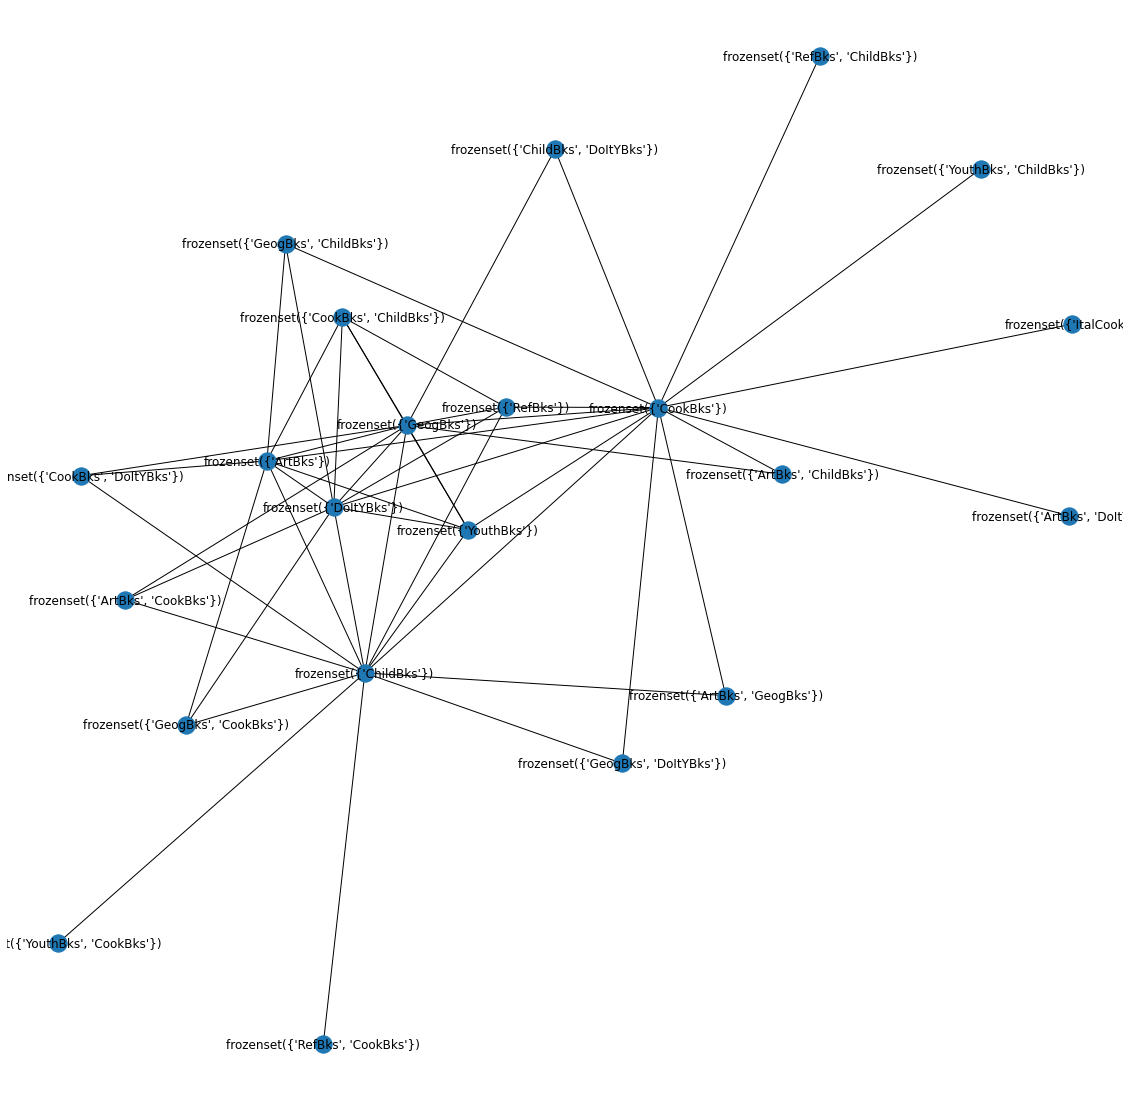

In [141]:
plotting_frequent_items(rules1)

###### Observation: We can see that when the support value is decreased the items increase and therefore we can see more items in the above plot. This is because much more items pass the support value threshold 

### Increasing the support value and decreasing the minimum value to 2:

In [150]:
fi_3 = frequent_itemsets(0.15, 2)
fi_3.sort_values('support',ascending = False,inplace=True)
fi_3.sort_values

<bound method DataFrame.sort_values of     support              itemsets
2    0.4310             (CookBks)
0    0.4230            (ChildBks)
3    0.2820            (DoItYBks)
6    0.2760             (GeogBks)
8    0.2560   (CookBks, ChildBks)
1    0.2475            (YouthBks)
5    0.2410              (ArtBks)
4    0.2145              (RefBks)
12   0.1950   (GeogBks, ChildBks)
17   0.1925    (GeogBks, CookBks)
14   0.1875   (CookBks, DoItYBks)
9    0.1840  (DoItYBks, ChildBks)
16   0.1670     (ArtBks, CookBks)
7    0.1650  (YouthBks, ChildBks)
11   0.1625    (ArtBks, ChildBks)
13   0.1620   (YouthBks, CookBks)
15   0.1525     (RefBks, CookBks)
10   0.1515    (RefBks, ChildBks)>

In [151]:
rules2 = association_rules(fi_3, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
21,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
20,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
19,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
18,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
10,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
11,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


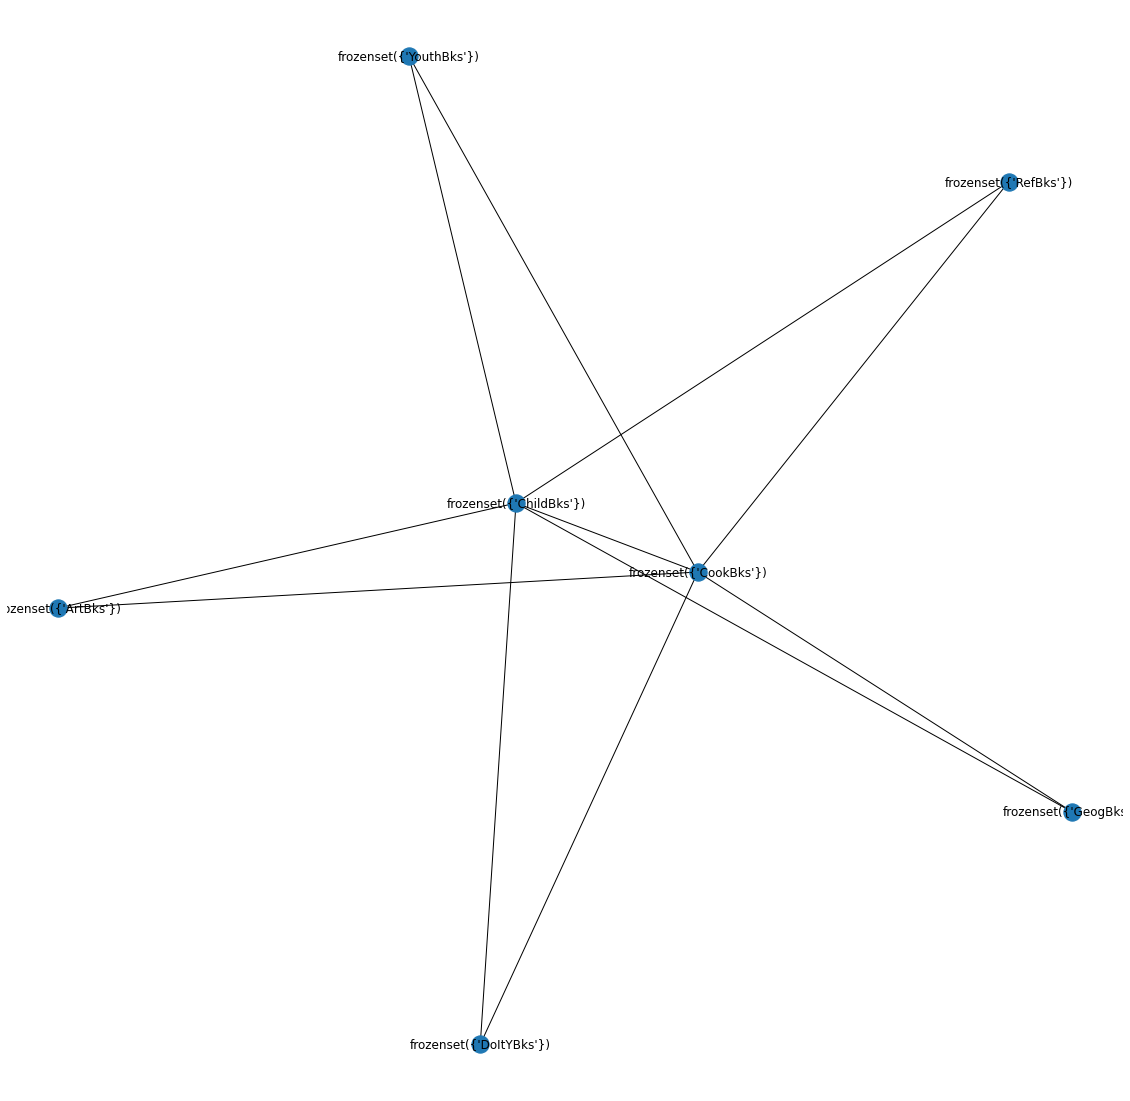

In [160]:
plotting_frequent_items(rules2)

###### Observation:We can see that when we increase the support value threshold and decrease the minimum items number, the items decrease and we can see the relationship between the books Cookbooks and Childboks with the other books

### Increasing the confidence threshold:

In [154]:
fi_4 = frequent_itemsets(0.15, 2)
fi_4.sort_values('support',ascending = False,inplace=True)
fi_4.sort_values

<bound method DataFrame.sort_values of     support              itemsets
2    0.4310             (CookBks)
0    0.4230            (ChildBks)
3    0.2820            (DoItYBks)
6    0.2760             (GeogBks)
8    0.2560   (CookBks, ChildBks)
1    0.2475            (YouthBks)
5    0.2410              (ArtBks)
4    0.2145              (RefBks)
12   0.1950   (GeogBks, ChildBks)
17   0.1925    (GeogBks, CookBks)
14   0.1875   (CookBks, DoItYBks)
9    0.1840  (DoItYBks, ChildBks)
16   0.1670     (ArtBks, CookBks)
7    0.1650  (YouthBks, ChildBks)
11   0.1625    (ArtBks, ChildBks)
13   0.1620   (YouthBks, CookBks)
15   0.1525     (RefBks, CookBks)
10   0.1515    (RefBks, ChildBks)>

In [166]:
rules3 = association_rules(fi_3, metric="confidence", min_threshold=0.6)
rules3.head(20)
rules3.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
10,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
2,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
5,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
7,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
6,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
3,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
8,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


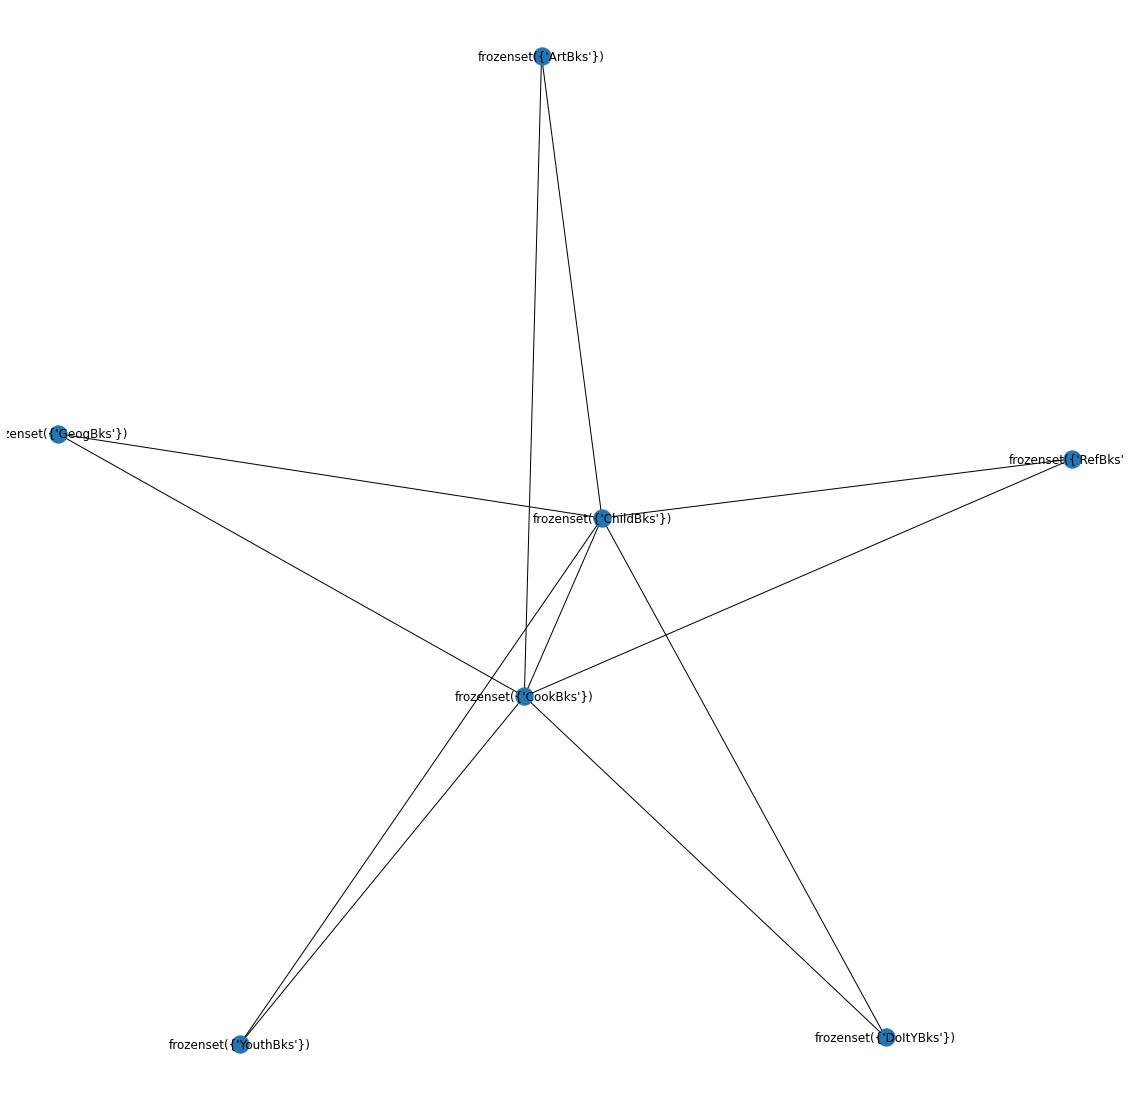

In [167]:
plotting_frequent_items(rules3)

###### Observation: We can see that the items have decreased and we can easily find the association with the most frequently sold books (Cookbooks and Childbooks)